In [37]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
import glob
import networkx as nx
#import Bio.KEGG.KGML.KGML_parser as keg

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
numpy 1.19.1
pandas 1.1.1
matplotlib 3.3.1


In [38]:
shr=pd.read_table('result_SL/shRNA_M003_I10_WI_Exp_fdr.txt',sep='\t')
crp=pd.read_table('result_SL/CRISPER_M003_I10_WI_Exp_fdr.txt',sep='\t')
shr
crp

,mut_gene,dep_gene,t_val,p_val,fdr
0,A2M,USP10,0.14712,0.883703,0.989793
1,A2M,EPB41L4A,1.87634,0.067338,0.782988
2,A2M,VWF,0.93661,0.354866,0.907156
3,A2M,ZNF180,0.18181,0.856475,0.987057
4,A2M,PI4K2A,0.67563,0.502787,0.938335
...,...,...,...,...,...
31734106,GOLGA8R,CPB2,-0.25572,0.800789,0.981145
31734107,GOLGA8R,SEMA5A,3.92642,0.000824,0.522942
31734108,GOLGA8R,HECW2,-0.34673,0.731971,0.973043
31734109,GOLGA8R,CERK,-0.77552,0.445859,0.927564


,mut_gene,dep_gene,t_val,p_val,fdr
0,A2M,H3C2,-0.35018,0.728189,0.983042
1,A2M,TMC7,0.32794,0.744790,0.984325
2,A2M,AUH,-1.28474,0.206635,0.917494
3,A2M,AQP1,-0.32539,0.746796,0.984475
4,A2M,COL5A2,-1.20072,0.237278,0.923748
...,...,...,...,...,...
72278360,FPGT-TNNI3K,JOSD1,0.14593,0.884485,0.993768
72278361,FPGT-TNNI3K,PDC,-1.84931,0.072650,0.874982
72278362,FPGT-TNNI3K,GPALPP1,2.73008,0.008506,0.790522
72278363,FPGT-TNNI3K,TYRO3,1.13887,0.259580,0.927945


In [39]:
crp_sig=crp.loc[crp['fdr']<0.2]
crp_sig

,mut_gene,dep_gene,t_val,p_val,fdr
48780,ABCA3,SOX2,-4.89987,3.575120e-06,0.175854
59281,ABCA3,SLC38A10,-4.96298,4.090210e-06,0.185720
97763,ABL1,STX16,-5.37088,8.362620e-07,0.092940
127900,ABL2,ALDH18A1,-6.28187,2.757970e-08,0.012778
156005,ACACA,DAO,-7.59885,8.004260e-09,0.005331
...,...,...,...,...,...
71882470,MUC5B,CYCS,4.76060,3.398130e-06,0.172480
71887257,MUC5B,HLA-B,-4.97022,1.317910e-06,0.116420
71887686,MUC5B,NDUFC2,5.25072,3.972370e-07,0.063241
71991140,RAD51AP2,FURIN,-5.94456,2.466310e-07,0.047284


In [46]:
crp.loc[(crp['mut_gene']=='KRAS')&(crp['dep_gene']=='STK33')]

,mut_gene,dep_gene,t_val,p_val,fdr
10002729,KRAS,STK33,-0.06536,0.947957,0.997363


In [44]:
crp.loc[crp['dep_gene'].isin(['FAS','CD95','HDAC6','MELK','MEN1','MTH1','NUDT1','PAK4','PIM1','SMYD2','STK33'])].sort_values(by='fdr')
crp_sig.loc[crp_sig['dep_gene'].isin(['FAS','CD95','HDAC6','MELK','MEN1','MTH1','NUDT1','PAK4','PIM1','SMYD2','STK33'])]

,mut_gene,dep_gene,t_val,p_val,fdr
32734215,SPEN,FAS,4.26952,0.000034,0.377284
18987157,TECTA,MELK,4.18021,0.000057,0.425480
54928534,EPPK1,MELK,4.06492,0.000084,0.463309
64434606,DENND2C,STK33,4.43220,0.000093,0.474844
10905283,SMAD4,NUDT1,-4.04322,0.000142,0.515832
...,...,...,...,...,...
43672370,DZANK1,MELK,0.00038,0.999695,0.999985
50530649,CLSTN2,PAK4,-0.00034,0.999729,0.999987
56603628,KDM2B,FAS,-0.00029,0.999772,0.999989
13231226,NOTCH2,PAK4,-0.00020,0.999840,0.999992


,mut_gene,dep_gene,t_val,p_val,fdr


In [40]:
shr_sig=shr.loc[shr['fdr']<0.2]
shr_sig

,mut_gene,dep_gene,t_val,p_val,fdr
12541,ABAT,SMARCA2,-4.96720,6.242960e-06,0.178855
18175,ABCA1,NAB1,-4.78971,6.405560e-06,0.180468
55423,ABL2,GPR143,-5.12517,2.976750e-06,0.136300
68715,ACACA,GPN3,-5.03561,5.486250e-06,0.171191
112630,ACVR2A,MEF2D,-5.27095,2.329960e-06,0.120031
...,...,...,...,...,...
31712225,IQCJ-SCHIP1,BCL2,-5.47386,7.815210e-06,0.192106
31712494,IQCJ-SCHIP1,TFDP1,-5.73816,7.428490e-06,0.190122
31715769,ZNF865,TAF15,5.13721,3.624470e-06,0.148412
31730948,GOLGA8R,CSNK1D,-5.80049,4.004990e-06,0.154468


In [43]:
shr.loc[shr['dep_gene'].isin(['FAS','CD95','HDAC6','MELK','MEN1','MTH1','NUDT1','PAK4','PIM1','SMYD2','STK33'])]
shr_sig.loc[shr_sig['dep_gene'].isin(['FAS','CD95','HDAC6','MELK','MEN1','MTH1','NUDT1','PAK4','PIM1','SMYD2','STK33'])]

,mut_gene,dep_gene,t_val,p_val,fdr
3076,A2M,MELK,0.48557,0.629629,0.959175
3364,A2M,HDAC6,-0.45350,0.652244,0.962435
3834,A2M,PAK4,-0.83447,0.408576,0.919727
3845,A2M,MEN1,0.82535,0.413645,0.920840
3961,A2M,PIM1,1.16515,0.249458,0.877106
...,...,...,...,...,...
31732627,GOLGA8R,MEN1,1.19069,0.246454,0.876071
31732728,GOLGA8R,PIM1,-0.01927,0.984800,0.998810
31732740,GOLGA8R,STK33,0.40878,0.687049,0.967234
31732867,GOLGA8R,NUDT1,-0.21748,0.829649,0.984274


,mut_gene,dep_gene,t_val,p_val,fdr
8425737,TP53,HDAC6,4.96375,0.000001,0.086462


In [47]:
shr.loc[(shr['mut_gene']=='KRAS')&(shr['dep_gene']=='STK33')]

,mut_gene,dep_gene,t_val,p_val,fdr
4342155,KRAS,STK33,0.54133,0.588891,0.952964


In [ ]:
crp_sig.loc[crp_sig['dep_gene'].isin([])]

In [12]:
crp_sig.loc[crp_sig['t_val']<0]

,mut_gene,dep_gene,t_val,p_val,fdr
12541,ABAT,SMARCA2,-4.96720,6.242960e-06,0.178855
18175,ABCA1,NAB1,-4.78971,6.405560e-06,0.180468
55423,ABL2,GPR143,-5.12517,2.976750e-06,0.136300
68715,ACACA,GPN3,-5.03561,5.486250e-06,0.171191
112630,ACVR2A,MEF2D,-5.27095,2.329960e-06,0.120031
...,...,...,...,...,...
31647525,ZNF730,ERBB3,-6.20846,4.068670e-07,0.050162
31712225,IQCJ-SCHIP1,BCL2,-5.47386,7.815210e-06,0.192106
31712494,IQCJ-SCHIP1,TFDP1,-5.73816,7.428490e-06,0.190122
31730948,GOLGA8R,CSNK1D,-5.80049,4.004990e-06,0.154468


## sig GI in the both WO and WI

In [13]:
def get_WO_or_WI(file_name):
    res=pd.read_table('result_SL/{}'.format(file_name),sep='\t')
    res['mut_dep']=res['mut_gene']+'_'+res['dep_gene']
    res=res.set_index('mut_dep')
    res=res.drop(['mut_gene','dep_gene'], axis='columns')
    res_sig=res.loc[res['fdr']<0.2]
    return res, res_sig


def get_fdr_diff(tp):
    WO, WO_sig=get_WO_or_WI('{}_M003_I10_WO_Exp_fdr.txt'.format(tp))
    WI, WI_sig=get_WO_or_WI('{}_M003_I10_WI_Exp_fdr.txt'.format(tp))
    union_index=set(WO_sig.index)|set(WI_sig.index)
    print(len(WO_sig))
    print(len(WI_sig))
    print(len(set(WO_sig.index)&set(WI_sig.index)))

    WO_un=WO.loc[union_index&set(WO.index)]
    WO_un.columns='WO_'+WO_un.columns
    WI_un=WI.loc[union_index&set(WI.index)]
    WI_un.columns='WI_'+WI_un.columns
    WOWI_sig=pd.concat([WO_un,WI_un], axis=1, join='inner')

    WOWI_sig['t_val_diff']=WOWI_sig['WO_t_val']-WOWI_sig['WI_t_val']
    
    return WOWI_sig

diff_dic={}
for tp in ['shRNA', 'CRISPER']:
    print('## ', tp)
    diff_dic[tp]=get_fdr_diff(tp)
    diff_dic[tp]

##  shRNA
1459
1389
1276


,WO_t_val,WO_p_val,WO_fdr,WI_t_val,WI_p_val,WI_fdr,t_val_diff
mut_dep,,,,,,,
SH2D2A_SOCS5,5.76987,4.769960e-06,0.163995,5.76987,4.769960e-06,0.161679,0.00000
TP53_KCNC3,5.14462,4.722060e-07,0.055586,4.99240,1.003140e-06,0.083117,0.15222
SLC12A5_E2F2,5.28792,8.657880e-06,0.200605,5.28792,8.657880e-06,0.199035,0.00000
TCERG1_NADK,-5.31811,1.574800e-06,0.101467,-5.31811,1.574800e-06,0.100959,0.00000
CLDN8_ETV1,4.75844,2.327950e-05,0.267105,5.21277,5.557060e-06,0.172798,-0.45433
...,...,...,...,...,...,...,...
BRAF_NR2F2,5.76542,4.388220e-08,0.012612,5.76542,4.388220e-08,0.012776,0.00000
NPBWR1_GABRR2,5.36259,7.221260e-06,0.187962,5.37837,6.592530e-06,0.181133,-0.01578
PCLO_DHX9,5.00590,9.479170e-07,0.081440,5.00590,9.479170e-07,0.080158,0.00000


##  CRISPER
1623
1740
1456


,WO_t_val,WO_p_val,WO_fdr,WI_t_val,WI_p_val,WI_fdr,t_val_diff
mut_dep,,,,,,,
TP53_CENPF,-6.11063,2.297850e-09,0.002515,-6.11063,2.297850e-09,0.002214,0.00000
TP53_WDR4,4.68143,3.713720e-06,0.193160,4.68143,3.713720e-06,0.178414,0.00000
ARID1A_PRSS3,-5.00395,1.276980e-06,0.125541,-4.92873,1.900080e-06,0.137121,-0.07522
TP53_RPS27L,-4.72343,3.427610e-06,0.186102,-4.72343,3.427610e-06,0.172643,0.00000
TP53_PRPH2,4.59154,5.813620e-06,0.232403,5.08227,6.327130e-07,0.078847,-0.49073
...,...,...,...,...,...,...,...
ABI3BP_SLC16A10,5.83951,7.281650e-07,0.095295,5.65688,1.433830e-06,0.120463,0.18263
EIF3A_MSMO1,-5.32935,1.891870e-06,0.150399,-5.32935,1.891870e-06,0.137121,0.00000
HLA-DQB2_SCYL1,-6.31890,3.882160e-07,0.070042,-6.31890,3.882160e-07,0.062355,0.00000


### read expression file

In [14]:
# mapping human gene symbol to entrez
dat=pd.read_table('data_ori/Sym2Entrez.txt',sep='\t')
dat.columns=['sym','entrez']
dat=dat.loc[dat['entrez'].notnull()]
dat=dat.loc[dat['sym'].notnull()]
dat['entrez']=dat['entrez'].astype(int).astype(str)

e2s=dat.set_index('entrez')
e2s_dic=e2s['sym'].to_dict() # e2s_dic={'1': 'A1BG', '503538': 'A1BG-AS1': ,...}

In [15]:
exp_ori=pd.read_table('data_ori/CCLE_expression.csv',index_col=0, sep=',') # CCLE_expression, 19144 genes, 1305 cells

print('# of nan: ', exp_ori.isnull().sum().sum()) # not containing nan value

exp_ori.columns=[gene.split(' ')[1] for gene in exp_ori.columns]
exp_ori.columns=[col[1:-1] for col in exp_ori.columns]
exp_ori.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in exp_ori.columns]
exp_ori=exp_ori.loc[:,exp_ori.columns!='NA_symbol']

exp_arr=np.array(exp_ori)
print('# of ori expresions: ', exp_arr.flatten().shape)

exp_nonzero=exp_arr[exp_arr!=0]
print('# of non-zero expresions: ', exp_nonzero.shape)

exp_ori.index.name='DepMap_ID'
exp_ori.head(3)

# of nan:  0
# of ori expresions:  (24975090,)
# of non-zero expresions:  (20781966,)


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SCYGR3,SCYGR7,OR8S1,SCYGR6,OR4F29,EEF1AKMT4,TBCE,OOSP4A,ARHGAP11B,OOSP3
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-001097,0.000000,0.0,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106,2.150560,...,0.0,0.0,0.0,0.0,0.0,2.980025,5.132988,0.0,0.443607,0.000000
ACH-001636,0.000000,0.0,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488,3.620586,...,0.0,0.0,0.0,0.0,0.0,4.322649,4.100978,0.0,2.589763,0.298658
ACH-001804,4.934988,0.0,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474,4.139961,...,0.0,0.0,0.0,0.0,0.0,2.283922,4.288359,0.0,0.475085,0.000000


### read mutation profile

In [16]:
mut_cnt=pd.read_table('data_preproc/mut_varL.txt',index_col=0, sep='\t')

mut_cnt.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in mut_cnt.columns]
mut_cnt=mut_cnt.loc[:,mut_cnt.columns!='NA_symbol']

mut_cnt.head(3)

,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,AARS1,ABAT,...,PTGES3L,DNAH17-AS1,FMC1-LUC7L2,PYURF,OVCH1-AS1,GOLGA8R,NPIPA8,ZNF891,SPECC1L-ADORA2A,MEI4
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## load CRISPER profiles

### read depletion profile

In [17]:
dep_crp=pd.read_table('data_preproc/dep_crisper.txt',index_col=0, sep='\t')

dep_crp.columns=[col[1:-1] for col in dep_crp.columns]
dep_crp.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in dep_crp.columns]
dep_crp=dep_crp.loc[:,dep_crp.columns!='NA_symbol']

dep_crp.head(3)

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZSWIM8,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000004,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.174114,-0.161678,-0.160386,-0.122795,-0.464567,0.258084,0.237593,-0.408563,0.291832,0.218575
ACH-000005,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.273881,-0.231005,-0.497114,-0.195061,-0.408063,0.229242,-0.075883,-0.104001,0.075901,0.036985
ACH-000007,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.131611,-0.106505,-0.580785,-0.093252,-0.276874,0.211699,-0.012654,-0.351716,0.089140,-0.392549


### get shared cells between mut_count and dep_crisper

In [18]:
shared_index=set(mut_cnt.index) & set(dep_crp.index) & set(exp_ori.index)
shared_columns=set(dep_crp.columns) & set(exp_ori.columns)
mut_cri=mut_cnt.loc[shared_index]
dep_cri=dep_crp.loc[shared_index, shared_columns]
exp_cri=exp_ori.loc[shared_index, shared_columns]

## load shRNA profiles

### read depletion profile

In [19]:
dep_shr=pd.read_table('data_preproc/dep_shRNA.txt',index_col=0, sep='\t')

dep_shr.columns=[col[1:-1] for col in dep_shr.columns]
dep_shr.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in dep_shr.columns]
dep_shr=dep_shr.loc[:,dep_shr.columns!='NA_symbol']

dep_shr.head(3)

,CDH2,AKT3,MED6,NR2E3,SIGLEC14,KCNE3,ZBTB33,CDH3,CDC42P3,HDAC6,...,NR1H4,CCS,NR1D2,CDC42,RCE1,HNRNPDL,DMTF1,PPP4R1,KCNE2,CASP8AP2
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-001270,-0.194962,-0.256108,-0.174220,-0.140052,0.077742,-0.235161,-0.012051,0.135390,0.197630,-0.042870,...,0.077694,0.224705,0.178494,-0.273734,-0.201644,-0.363670,0.184260,-0.115616,0.088853,-0.843295
ACH-001000,-0.028171,0.100751,-0.456124,-0.174618,-0.111691,-0.057127,-0.036372,0.019846,0.053259,0.022057,...,-0.120004,0.249664,-0.057862,-0.274488,0.074889,0.152158,0.036011,0.117300,-0.110628,-0.307031
ACH-001001,0.063047,-0.008077,-0.214376,-0.153619,-0.195624,0.143540,-0.003294,0.137083,-0.184220,0.000256,...,0.265685,-0.003567,0.064435,-0.065205,0.006735,-0.033385,0.197651,-0.016372,0.057286,-0.413669


### get shared cells between mut_count and dep_crisper

In [20]:
shared_index=set(mut_cnt.index) & set(dep_shr.index) & set(exp_ori.index)
shared_columns=set(dep_shr.columns) & set(exp_ori.columns)
mut_shn=mut_cnt.loc[shared_index]
dep_shn=dep_shr.loc[shared_index, shared_columns]
exp_shn=exp_ori.loc[shared_index, shared_columns]

## boxplots comaring WIexp and WOexp

Text(0, 0.5, 'depletion score')

Text(0.03, 0.95, '(a)')

Text(0.51, 0.95, '(b)')

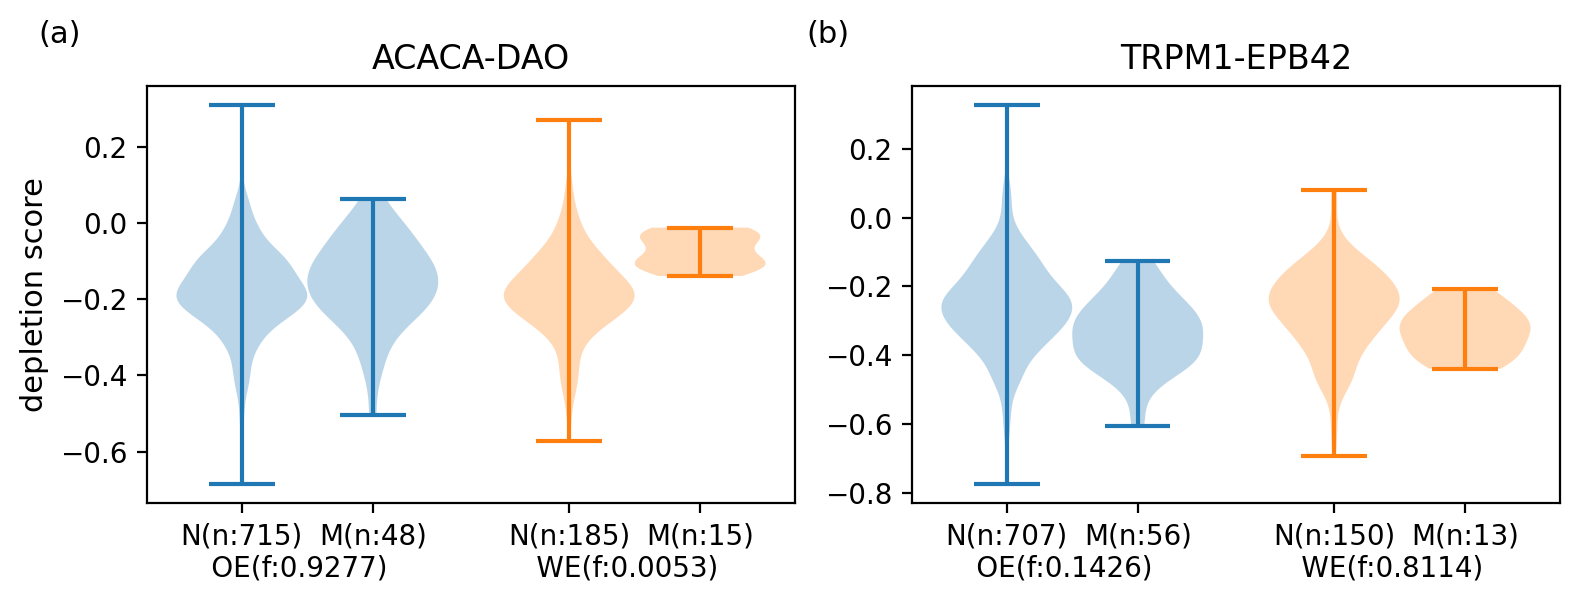

In [35]:
def draw_boxplot(mut1, dep1, exp1, mut_g, dep_g, ax):
    mut_sr=mut1[mut_g]
    dep_sr=dep1[dep_g]
    exp_sr=exp1[dep_g]

    # merge mutation, depletion, expression
    mer_df=pd.concat([mut_sr,dep_sr,exp_sr], axis=1, join='inner')
    mer_df.columns=['mut','dep','exp']

    # ttest without considering expression data
    ret=[]
    
    con_dep_score=mer_df.loc[mer_df['mut']==0, 'dep']
    mut_dep_score=mer_df.loc[mer_df['mut']!=0, 'dep']
    #ax.boxplot([con_dep_score, mut_dep_score], positions=[1,1.8], widths=0.8)
    ax.violinplot([con_dep_score, mut_dep_score], positions=[1,1.8], widths=0.8)
    ret+=[len(con_dep_score),len(mut_dep_score)]
    
    mer_df=mer_df.loc[mer_df['exp']!=0]
    con_dep_score=mer_df.loc[mer_df['mut']==0, 'dep']
    mut_dep_score=mer_df.loc[mer_df['mut']!=0, 'dep']
    ax.violinplot([con_dep_score, mut_dep_score], positions=[3,3.8], widths=0.8)
    ret+=[len(con_dep_score),len(mut_dep_score)]
    
    return ret

def draw_boxplot_v2(top,ax,tp):
    mut_g, dep_g=top.name.split('_')
    ax.set_title('{}-{}'.format(mut_g, dep_g),fontsize=12)
    
    ret=draw_boxplot(mut_cri, dep_cri, exp_cri, mut_g, dep_g, ax=ax)
    
    ax.set_xticks([1,1.8,3,3.8])
    xticklab=['{}(n:{})'.format(x,y) for x,y in zip(['N','M','N','M'],ret)]
    
    wo_f=top['WO_fdr']; wi_f=top['WI_fdr']

    xticklab[0]=xticklab[0]+'\n             OE(f:{:.4f})'.format(wo_f)
    xticklab[2]=xticklab[2]+'\n             WE(f:{:.4f})'.format(wi_f)
    ax.set_xticklabels(xticklab, fontsize=10)



fig=plt.figure(figsize=(8,3), dpi=200)
axs=fig.subplots(1,2).flatten()

### CRISPER
cri_df=diff_dic['CRISPER']

## WI sig, WO trivial
sorted_cri_df=cri_df.loc[cri_df['WI_fdr']<0.2].sort_values(by='t_val_diff', ascending=False)
## resistance
top=sorted_cri_df.iloc[0]
draw_boxplot_v2(top,axs[0],'C')
axs[0].set_ylabel('depletion score', fontsize=11)

### shRNA
shr_df=diff_dic['shRNA']

## WO sig, WI trivial
sorted_shr_df=cri_df.loc[cri_df['WO_fdr']<0.2].sort_values(by='t_val_diff', ascending=False)
## resistance
top=sorted_shr_df.iloc[1]
draw_boxplot_v2(top,axs[1],'S')

x=0.03
for num in ['(a)','(b)']:
    fig.text(x=x,y=0.95, s=num, fontsize=11)
    x+=0.48

fig.tight_layout(h_pad=2.0)
fig.savefig('figure1.jpg')